# Power Outages
This project uses major power outage data in the continental U.S. from January 2000 to July 2016. Here, a major power  outage is defined as a power outage that impacted at least 50,000 customers or caused an unplanned firm load loss of atleast 300MW. Interesting questions to consider include:
- Where and when do major power outages tend to occur?
- What are the characteristics of major power outages with higher severity? Variables to consider include location, time, climate, land-use characteristics, electricity consumption patterns, economic characteristics, etc. What risk factors may an energy company want to look into when predicting the location and severity of its next major power outage?
- What characteristics are associated with each category of cause?
- How have characteristics of major power outages changed over time? Is there a clear trend?

### Getting the Data
The data is downloadable [here](https://engineering.purdue.edu/LASCI/research-data/outages/outagerisks).

A data dictionary is available at this [article](https://www.sciencedirect.com/science/article/pii/S2352340918307182) under *Table 1. Variable descriptions*.

### Cleaning and EDA
- Note that the data is given as an Excel file rather than a CSV. Open the data in Excel or another spreadsheet application and determine which rows and columns of the Excel spreadsheet should be ignored when loading the data in pandas.
- Clean the data.
    - The power outage start date and time is given by `OUTAGE.START.DATE` and `OUTAGE.START.TIME`. It would be preferable if these two columns were combined into one datetime column. Combine `OUTAGE.START.DATE` and `OUTAGE.START.TIME` into a new datetime column called `OUTAGE.START`. Similarly, combine `OUTAGE.RESTORATION.DATE` and `OUTAGE.RESTORATION.TIME` into a new datetime column called `OUTAGE.RESTORATION`.
- Understand the data in ways relevant to your question using univariate and bivariate analysis of the data as well as aggregations.

*Hint 1: pandas can load multiple filetypes: `pd.read_csv`, `pd.read_excel`, `pd.read_html`, `pd.read_json`, etc.*

*Hint 2: `pd.to_datetime` and `pd.to_timedelta` will be useful here.*

*Tip: To visualize geospatial data, consider [Folium](https://python-visualization.github.io/folium/) or another geospatial plotting library.*

### Assessment of Missingness
- Assess the missingness of a column that is not missing by  design.

### Hypothesis Test
Find a hypothesis test to perform. You can use the questions at the top of the notebook for inspiration.

# Summary of Findings

### Introduction
For this project, we are doing analysis towards outage dataset. 

### Cleaning and EDA
TODO

### Assessment of Missingness
TODO

### Hypothesis Test
TODO

# Code

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'  # Higher resolution figures

### Cleaning and EDA

In [3]:
# read the table
df = pd.read_excel('outage.xlsx')
df

,Major power outage events in the continental U.S.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56
0,Time period: January 2000 - July 2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Regions affected: Outages reported in this dat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,variables,OBS,YEAR,MONTH,U.S._STATE,POSTAL.CODE,NERC.REGION,CLIMATE.REGION,ANOMALY.LEVEL,CLIMATE.CATEGORY,...,POPPCT_URBAN,POPPCT_UC,POPDEN_URBAN,POPDEN_UC,POPDEN_RURAL,AREAPCT_URBAN,AREAPCT_UC,PCT_LAND,PCT_WATER_TOT,PCT_WATER_INLAND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,NaN,1530,2011,12,North Dakota,ND,MRO,West North Central,-0.9,cold,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177
1536,NaN,1531,2006,NaN,North Dakota,ND,MRO,West North Central,NaN,NaN,...,59.9,19.9,2192.2,1868.2,3.9,0.27,0.1,97.5996,2.40177,2.40177
1537,NaN,1532,2009,8,South Dakota,SD,RFC,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077,1.69226,1.69226
1538,NaN,1533,2009,8,South Dakota,SD,MRO,West North Central,0.5,warm,...,56.65,26.73,2038.3,1905.4,4.7,0.3,0.15,98.3077,1.69226,1.69226


In [4]:
#Combine OUTAGE.START.DATE and OUTAGE.START.TIME into a new datetime column called OUTAGE.START
out = df.copy()
out = out.drop(index = [0,1,2,3,5]).reset_index(drop=True)
out.columns = out.iloc[0]
out = out.drop(index = [0])
out = out.drop(columns=['variables'])

#out['OUTAGE.START.DATE'] = pd.to_datetime(out['OUTAGE.START.DATE']).astype(str)
#out['OUTAGE.START.TIME'] = pd.to_datetime(out['OUTAGE.START.TIME']).astype(str)
#out['OUTAGE.START'] = out['OUTAGE.START.DATE'] + out['OUTAGE.START.TIME']

out['OUTAGE.START'] = pd.to_datetime(out['OUTAGE.START.DATE']).astype(str) + " " +out['OUTAGE.START.TIME'].astype(str)
out['OUTAGE.START'] = out['OUTAGE.START'].replace('nannan',np.NaN)
out['OUTAGE.START'] = out['OUTAGE.START'].replace('NaT nan',np.NaN)
out['OUTAGE.START'] = pd.to_datetime(out['OUTAGE.START'])
out['OUTAGE.START']  
#combine OUTAGE.RESTORATION.DATE and OUTAGE.RESTORATION.TIME into a new datetime column called OUTAGE.RESTORATION.
out['OUTAGE.RESTORATION'] = pd.to_datetime(out['OUTAGE.RESTORATION.DATE']).astype(str) + " " +out['OUTAGE.RESTORATION.TIME'].astype(str)
out['OUTAGE.RESTORATION'] = out['OUTAGE.RESTORATION'].replace('nannan',np.NaN)
out['OUTAGE.RESTORATION'] = out['OUTAGE.RESTORATION'].replace('NaT nan',np.NaN)
out['OUTAGE.RESTORATION'] = pd.to_datetime(out['OUTAGE.RESTORATION'])
out.columns

Index(['OBS', 'YEAR', 'MONTH', 'U.S._STATE', 'POSTAL.CODE', 'NERC.REGION',
       'CLIMATE.REGION', 'ANOMALY.LEVEL', 'CLIMATE.CATEGORY',
       'OUTAGE.START.DATE', 'OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE',
       'OUTAGE.RESTORATION.TIME', 'CAUSE.CATEGORY', 'CAUSE.CATEGORY.DETAIL',
       'HURRICANE.NAMES', 'OUTAGE.DURATION', 'DEMAND.LOSS.MW',
       'CUSTOMERS.AFFECTED', 'RES.PRICE', 'COM.PRICE', 'IND.PRICE',
       'TOTAL.PRICE', 'RES.SALES', 'COM.SALES', 'IND.SALES', 'TOTAL.SALES',
       'RES.PERCEN', 'COM.PERCEN', 'IND.PERCEN', 'RES.CUSTOMERS',
       'COM.CUSTOMERS', 'IND.CUSTOMERS', 'TOTAL.CUSTOMERS', 'RES.CUST.PCT',
       'COM.CUST.PCT', 'IND.CUST.PCT', 'PC.REALGSP.STATE', 'PC.REALGSP.USA',
       'PC.REALGSP.REL', 'PC.REALGSP.CHANGE', 'UTIL.REALGSP', 'TOTAL.REALGSP',
       'UTIL.CONTRI', 'PI.UTIL.OFUSA', 'POPULATION', 'POPPCT_URBAN',
       'POPPCT_UC', 'POPDEN_URBAN', 'POPDEN_UC', 'POPDEN_RURAL',
       'AREAPCT_URBAN', 'AREAPCT_UC', 'PCT_LAND', 'PCT_WATER_TOT',
    

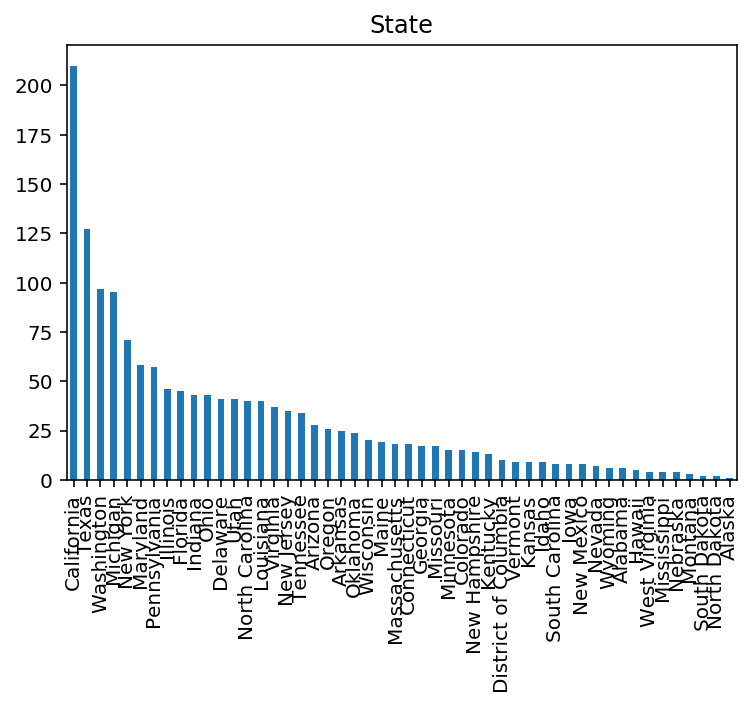

In [5]:
#Univariate Analysis
#Plot of State
plot = out['U.S._STATE'].value_counts().plot(kind='bar',title='State')
plt.show()

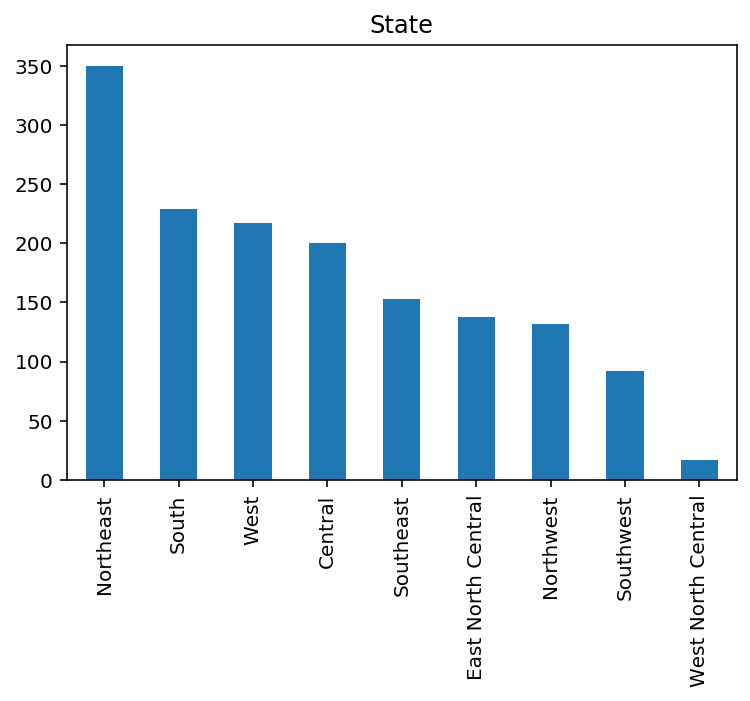

In [6]:
#Plot of Climate Region
plot = out['CLIMATE.REGION'].value_counts().plot(kind='bar',title='State')
plt.show()

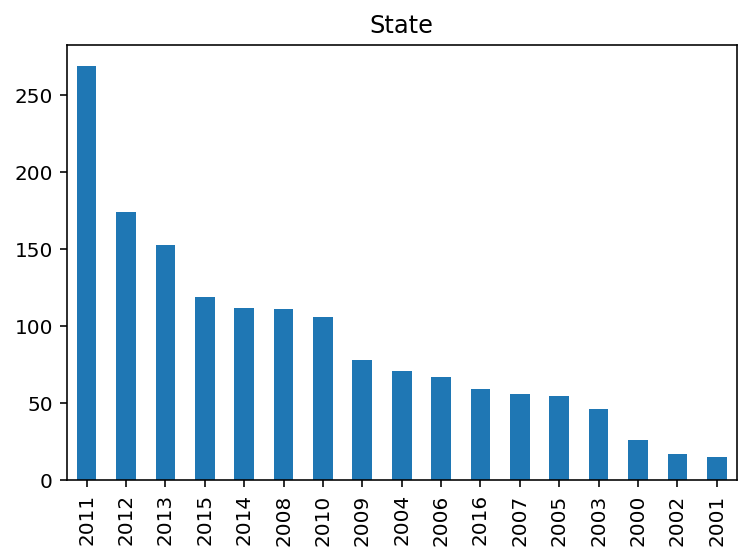

In [7]:
#Plot of Year
plot = out['YEAR'].value_counts().plot(kind='bar',title='State')
plt.show()

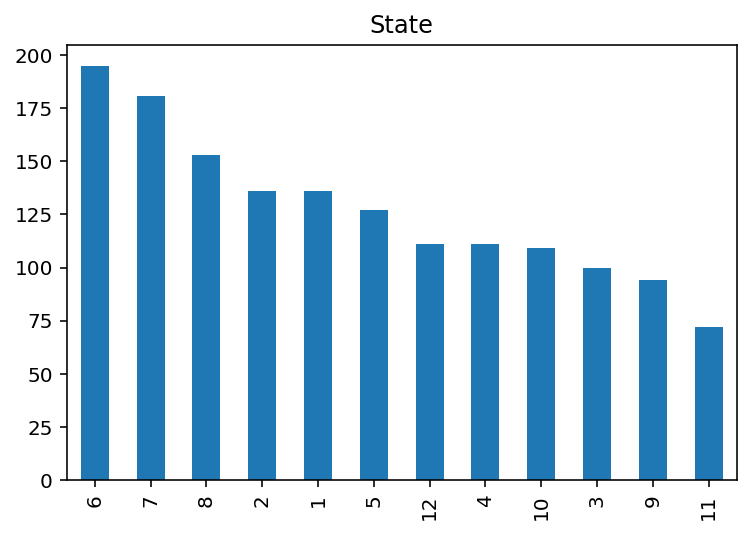

In [8]:
#Plot of Month
plot = out['MONTH'].value_counts().plot(kind='bar',title='State')
plt.show()

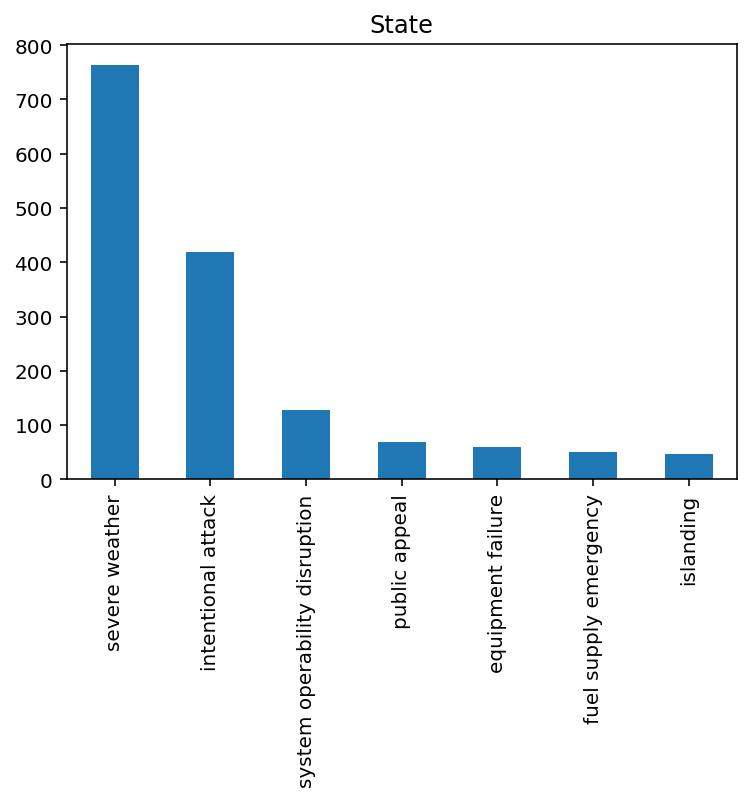

In [9]:
#Plot of Cause Category
plot = out['CAUSE.CATEGORY'].value_counts().plot(kind='bar',title='State')
plt.show()

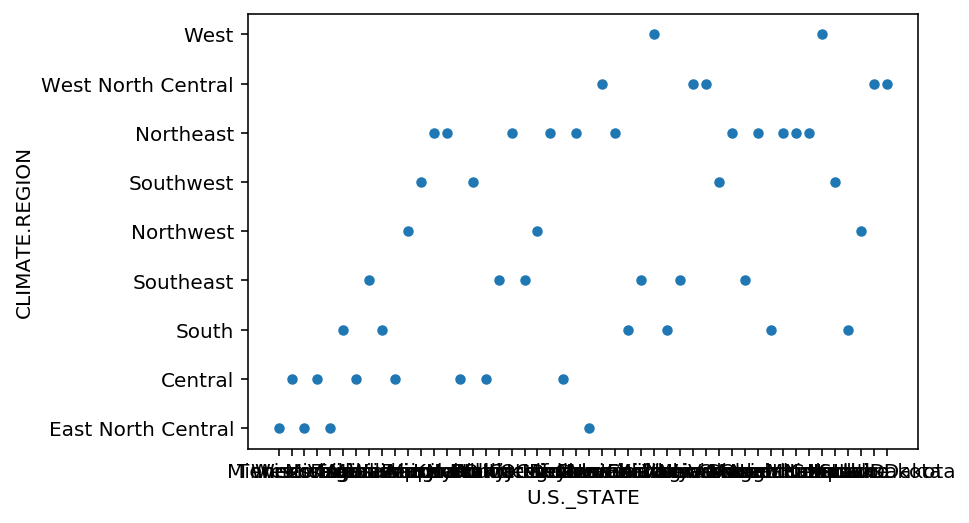

In [10]:
#Bivariate Analysis
#Check the relationship between Climate Region and State
cleaned = out[['CLIMATE.REGION','U.S._STATE']].dropna()
sns.scatterplot(y = cleaned['CLIMATE.REGION'], x = cleaned['U.S._STATE'])

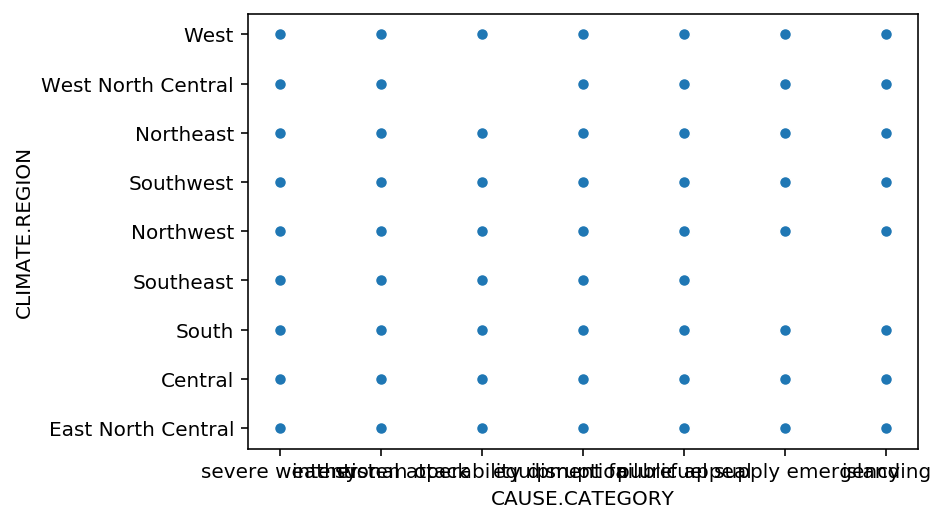

In [11]:
#Check the relationship between Climate Region and Cause Category
new_cleaned = out[['CLIMATE.REGION','CAUSE.CATEGORY']].dropna()
sns.scatterplot(y = new_cleaned['CLIMATE.REGION'], x = new_cleaned['CAUSE.CATEGORY'])

In [12]:
#Interesting Aggregates
#the relationship between CLIMATE REGION and OUTAGE DURATION
out[['CLIMATE.REGION','OUTAGE.DURATION']].dropna().groupby('CLIMATE.REGION').sum()

,OUTAGE.DURATION
CLIMATE.REGION,
Central,515916
East North Central,733230
Northeast,1029130
Northwest,156709
South,620450
Southeast,332653
Southwest,137820
West,333808
West North Central,11145


In [13]:
out[['CLIMATE.REGION','OUTAGE.DURATION','YEAR']].dropna().pivot_table(index = ['CLIMATE.REGION'],values = 'OUTAGE.DURATION',columns=['YEAR'],aggfunc=np.sum)

YEAR,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
CLIMATE.REGION,,,,,,,,,,,,,,,,,
Central,1200.0,NaN,15420.0,11057.0,17940.0,42139.0,11375.0,12126.0,88731.0,102704.0,38003.0,63018.0,58818.0,31234.0,18930.0,2022.0,1199.0
East North Central,NaN,NaN,3600.0,73785.0,27260.0,56129.0,13500.0,32406.0,54012.0,110654.0,38937.0,57034.0,21676.0,54494.0,170635.0,15690.0,3418.0
Northeast,681.0,597.0,9390.0,61525.0,16843.0,19616.0,80993.0,23475.0,71932.0,15564.0,151839.0,225895.0,184547.0,26630.0,99652.0,16924.0,23027.0
Northwest,NaN,NaN,NaN,8028.0,9720.0,NaN,72593.0,8316.0,448.0,1204.0,5160.0,15070.0,8392.0,6742.0,2695.0,12911.0,5430.0
South,2709.0,11747.0,20040.0,10429.0,40548.0,58832.0,3265.0,33566.0,182819.0,30990.0,34140.0,46084.0,23081.0,61779.0,7065.0,37775.0,15581.0
Southeast,32304.0,241.0,2921.0,5993.0,87898.0,94825.0,3015.0,1201.0,18787.0,8056.0,4189.0,22211.0,13257.0,7595.0,21368.0,7187.0,1605.0
Southwest,66.0,NaN,NaN,135.0,99058.0,NaN,2579.0,283.0,871.0,6925.0,2666.0,9134.0,624.0,9449.0,911.0,513.0,4606.0
West,NaN,5224.0,15143.0,43060.0,10913.0,14062.0,20143.0,14807.0,41215.0,5417.0,36211.0,45292.0,14495.0,10064.0,1853.0,6174.0,49735.0
West North Central,NaN,NaN,NaN,NaN,4.0,NaN,9600.0,NaN,60.0,346.0,233.0,720.0,NaN,126.0,56.0,NaN,NaN


### Assessment of Missingness

In [76]:
def per(outage,col,check_dep):
    distr = (
        outage
        .assign(is_null=outage[check_dep].isnull())
        .pivot_table(index='is_null', columns=col, aggfunc='size',fill_value = 0)
        .apply(lambda x:x / x.sum(), axis=1)
    )
    obs = distr.iloc[-1].abs().sum() / 2
    n_repetitions = 200
    tvds = []
    for i in range(n_repetitions):
        shuffled_col = (
            outage[col]
            .sample(replace=False, frac=1)
            .reset_index(drop=True)
        )
    
        shuffled = (
            outage
            .assign(**{
                col: shuffled_col,
                'is_null': outage[check_dep].isnull()
            })
        )
    
        shuffled = (
            shuffled
            .pivot_table(index='is_null', columns=col, aggfunc='size',fill_value=0)
            .apply(lambda x:x / x.sum(), axis=1)
        )
        tvd = shuffled.diff().iloc[-1].abs().sum() / 2
        tvds.append(tvd)
    
    print([col,check_dep])
    p_value = np.mean(tvds>obs)
    return p_value
outage = out.copy()
result = []
for i in outage.columns[6:57]:
    for j in outage.columns[6:57]:
        if i!= j:
            print(per(outage,i,j))
result

['CLIMATE.REGION', 'ANOMALY.LEVEL']
0.14
['CLIMATE.REGION', 'CLIMATE.CATEGORY']
0.105
['CLIMATE.REGION', 'OUTAGE.START.DATE']
0.125
['CLIMATE.REGION', 'OUTAGE.START.TIME']
0.1
['CLIMATE.REGION', 'OUTAGE.RESTORATION.DATE']
0.0
['CLIMATE.REGION', 'OUTAGE.RESTORATION.TIME']
0.0
['CLIMATE.REGION', 'CAUSE.CATEGORY']
0.0
['CLIMATE.REGION', 'CAUSE.CATEGORY.DETAIL']
0.0
['CLIMATE.REGION', 'HURRICANE.NAMES']
0.0
['CLIMATE.REGION', 'OUTAGE.DURATION']
0.0
['CLIMATE.REGION', 'DEMAND.LOSS.MW']
0.0
['CLIMATE.REGION', 'CUSTOMERS.AFFECTED']
0.0
['CLIMATE.REGION', 'RES.PRICE']
0.0
['CLIMATE.REGION', 'COM.PRICE']
0.0
['CLIMATE.REGION', 'IND.PRICE']
0.0
['CLIMATE.REGION', 'TOTAL.PRICE']
0.0
['CLIMATE.REGION', 'RES.SALES']
0.0
['CLIMATE.REGION', 'COM.SALES']
0.0
['CLIMATE.REGION', 'IND.SALES']
0.0
['CLIMATE.REGION', 'TOTAL.SALES']
0.0
['CLIMATE.REGION', 'RES.PERCEN']
0.0
['CLIMATE.REGION', 'COM.PERCEN']
0.0
['CLIMATE.REGION', 'IND.PERCEN']
0.0
['CLIMATE.REGION', 'RES.CUSTOMERS']
0.0
['CLIMATE.REGION', 'CO

['OUTAGE.START.TIME', 'CLIMATE.REGION']
1.0
['OUTAGE.START.TIME', 'ANOMALY.LEVEL']
1.0
['OUTAGE.START.TIME', 'CLIMATE.CATEGORY']
1.0
['OUTAGE.START.TIME', 'OUTAGE.START.DATE']
1.0
['OUTAGE.START.TIME', 'OUTAGE.RESTORATION.DATE']
1.0
['OUTAGE.START.TIME', 'OUTAGE.RESTORATION.TIME']
1.0
['OUTAGE.START.TIME', 'CAUSE.CATEGORY']
0.0
['OUTAGE.START.TIME', 'CAUSE.CATEGORY.DETAIL']
0.97
['OUTAGE.START.TIME', 'HURRICANE.NAMES']
1.0
['OUTAGE.START.TIME', 'OUTAGE.DURATION']
1.0
['OUTAGE.START.TIME', 'DEMAND.LOSS.MW']
0.45
['OUTAGE.START.TIME', 'CUSTOMERS.AFFECTED']
1.0
['OUTAGE.START.TIME', 'RES.PRICE']
1.0
['OUTAGE.START.TIME', 'COM.PRICE']
1.0
['OUTAGE.START.TIME', 'IND.PRICE']
1.0
['OUTAGE.START.TIME', 'TOTAL.PRICE']
1.0
['OUTAGE.START.TIME', 'RES.SALES']
1.0
['OUTAGE.START.TIME', 'COM.SALES']
1.0
['OUTAGE.START.TIME', 'IND.SALES']
1.0
['OUTAGE.START.TIME', 'TOTAL.SALES']
1.0
['OUTAGE.START.TIME', 'RES.PERCEN']
1.0
['OUTAGE.START.TIME', 'COM.PERCEN']
1.0
['OUTAGE.START.TIME', 'IND.PERCEN']
1.0

['CAUSE.CATEGORY', 'IND.CUST.PCT']
0.0
['CAUSE.CATEGORY', 'PC.REALGSP.STATE']
0.0
['CAUSE.CATEGORY', 'PC.REALGSP.USA']
0.0
['CAUSE.CATEGORY', 'PC.REALGSP.REL']
0.0
['CAUSE.CATEGORY', 'PC.REALGSP.CHANGE']
0.0
['CAUSE.CATEGORY', 'UTIL.REALGSP']
0.0
['CAUSE.CATEGORY', 'TOTAL.REALGSP']
0.0
['CAUSE.CATEGORY', 'UTIL.CONTRI']
0.0
['CAUSE.CATEGORY', 'PI.UTIL.OFUSA']
0.0
['CAUSE.CATEGORY', 'POPULATION']
0.0
['CAUSE.CATEGORY', 'POPPCT_URBAN']
0.0
['CAUSE.CATEGORY', 'POPPCT_UC']
0.0
['CAUSE.CATEGORY', 'POPDEN_URBAN']
0.0
['CAUSE.CATEGORY', 'POPDEN_UC']
0.01
['CAUSE.CATEGORY', 'POPDEN_RURAL']
0.005
['CAUSE.CATEGORY', 'AREAPCT_URBAN']
0.0
['CAUSE.CATEGORY', 'AREAPCT_UC']
0.0
['CAUSE.CATEGORY', 'PCT_LAND']
0.0
['CAUSE.CATEGORY', 'PCT_WATER_TOT']
0.0
['CAUSE.CATEGORY', 'PCT_WATER_INLAND']
0.0
['CAUSE.CATEGORY', 'OUTAGE.START']
0.01
['CAUSE.CATEGORY.DETAIL', 'CLIMATE.REGION']
0.895
['CAUSE.CATEGORY.DETAIL', 'ANOMALY.LEVEL']
0.705
['CAUSE.CATEGORY.DETAIL', 'CLIMATE.CATEGORY']
0.7
['CAUSE.CATEGORY.DETAI

KeyboardInterrupt: 

In [61]:
check_dep='CLIMATE.CATEGORY'
col = 'OUTAGE.DURATION'
shuffled_col = (
    outage[col]
    .sample(replace=False, frac=1)
    .reset_index(drop=True)
)

shuffled = (
    outage
    .assign(**{
        col: shuffled_col,
        'is_null': outage[check_dep].isnull()
    })
)

shuffled = (
    shuffled
    .pivot_table(index='is_null', columns=col, aggfunc='size',fill_value=0)
    .apply(lambda x:x / x.sum(), axis=1)
)
tvd = shuffled.diff().iloc[-1].abs().sum() / 2
display(shuffled)

OUTAGE.DURATION,0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,17,19,20,21,25,26,27,28,30,31,32,33,35,37,38,39,40,42,44,45,46,47,48,49,50,52,53,54,55,56,57,59,60,61,62,63,64,65,66,70,72,73,74,75,76,77,78,83,84,85,87,89,90,91,92,93,95,96,98,100,103,104,105,106,108,110,113,114,115,117,120,121,122,123,124,125,126,128,129,130,131,132,133,135,136,140,141,144,145,148,149,150,152,155,157,159,160,161,164,165,166,167,168,171,174,175,177,179,180,181,182,185,186,187,189,191,193,195,196,197,198,199,200,201,202,204,206,208,210,213,214,215,219,220,221,223,224,225,227,230,232,233,234,235,236,237,240,241,245,247,248,249,250,251,252,255,258,268,269,270,271,274,276,278,280,283,284,285,290,292,294,295,299,300,304,307,310,313,314,316,318,324,326,327,330,331,333,334,336,340,347,348,352,353,355,360,365,369,370,372,373,374,375,376,380,385,388,390,391,394,396,400,402,405,410,414,418,420,424,428,430,431,432,435,437,439,440,448,450,451,455,457,465,467,476,479,480,485,487,488,494,502,507,510,513,523,528,538,540,543,548,550,554,557,563,565,569,570,572,575,600,617,618,619,620,624,634,645,652,656,659,660,663,673,681,685,690,692,697,705,717,720,721,732,749,751,757,759,761,762,766,796,797,803,805,810,816,829,838,840,847,854,855,865,868,870,871,881,885,900,909,913,930,935,940,945,950,959,960,962,984,985,989,990,1000,1005,1008,1019,1020,1025,1035,1037,1042,1044,1046,1050,1054,1060,1068,1072,1077,1078,1080,1087,1099,1110,1120,1130,1135,1140,1183,1185,1187,1195,1196,1199,1200,1201,1203,1204,1205,1207,1219,1226,1230,1240,1254,1260,1265,1272,1276,1282,1290,1301,1318,1320,1322,1324,1335,1336,1337,1350,1355,1365,1367,1372,1380,1381,1406,1414,1419,1420,1423,1440,1450,1452,1455,1456,1460,1470,1485,1500,1508,1513,1523,1524,1526,1528,1530,1534,1548,1559,1560,1565,1569,1574,1579,1588,1590,1605,1620,1631,1637,1642,1656,1671,1673,1676,1680,1690,1695,1697,1698,1710,1714,1732,1733,1740,1755,1757,1770,1800,1826,1830,1835,1840,1843,1860,1865,1867,1890,1895,1906,1914,1919,1920,1950,1955,1980,1995,1999,2009,2010,2016,2021,2040,2050,2054,2055,2070,2085,2089,2100,2108,2120,2129,2140,2142,2146,2159,2160,2161,2190,2220,2245,2275,2279,2280,2299,2319,2325,2340,2355,2363,2370,2400,2415,2420,2425,2435,2460,2464,2490,2507,2515,2520,2535,2550,2551,2580,2610,2612,2615,2639,2640,2645,2652,2655,2668,2670,2680,2684,2690,2691,2694,2700,2710,2730,2759,2760,2761,2775,2790,2806,2818,2820,2843,2855,2865,2878,2880,2891,2895,2939,2941,2970,2985,3000,3015,3020,3037,3040,3050,3051,3058,3060,3067,3090,3100,3120,3137,3180,3186,3189,3232,3240,3255,3264,3300,3301,3305,3314,3339,3360,3366,3388,3408,3480,3494,3507,3525,3540,3569,3570,3584,3599,3600,3604,3621,3630,3637,3646,3667,3690,3698,3720,3842,3872,3894,3915,3938,3943,3960,4019,4032,4045,4050,4080,4110,4113,4122,4125,4139,4140,4150,4170,4177,4200,4232,4242,4254,4259,4260,4285,4290,4313,4320,4338,4380,4410,4440,4458,4470,4485,4510,4517,4560,4590,4605,4680,4710,4740,4745,4792,4800,4830,4890,4920,4921,5034,5040,5054,5071,5115,5160,5227,5250,5310,5320,5340,5355,5400,5490,5513,5579,5580,5595,5610,5628,5670,5700,5730,5760,5790,5820,5840,5850,5855,5865,5880,5910,6000,6030,6070,6074,6090,6240,6276,6300,6420,6480,6492,6510,6600,6660,6685,6690,6713,6780,6787,6840,6914,6938,6940,7020,7080,7200,7298,7319,7320,7371,7430,7440,7523,7530,7540,7560,7609,7620,7650,7700,7709,7800,7803,7809,7920,7962,7987,8054,8077,8100,8160,8189,8221,8268,8430,8468,8472,8640,8670,8873,8880,8922,8940,8979,9150,9230,9360,9450,9480,9486,9576,9600,9630,9719,9855,9857,9886,10080,10140,10274,10380,10499,10530,10619,10726,11058,11280,11296,11337,11420,11430,11525,11531,11580,11640,11700,11850,11867,11880,12060,12124,12180,12240,12652,12890,13140,13201,13215,13381,13430,13488,13650,13679,13920,13972,14040,14101,14190,14400,14500,14639,15180,15420,15492,15950,17310,17339,17520,17812,17865,18240,18660,18717,18804,20160,20280,20416,21360,21540,22769,23040,23187,23700,23773,24780,25920,27698,28170,34390,46080,49320,49427,60480,78377,108653
is_null,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [ ]:
outage

### Hypothesis Test

In [ ]:
# TODO